In [1]:
import pandas as pd 

In [2]:
import numpy as np

In [3]:
df=pd.read_csv("/Users/ronak/Library/Containers/com.microsoft.Excel/Data/Downloads/PS_20174392719_1491204439457_log.csv")

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [6]:
corr_value = df['step'].corr(df['isFraud'])
print("Correlation between amount and isFraud:", corr_value)

Correlation between amount and isFraud: 0.04503019107423602


In [7]:
# Drop one column
df = df.drop('step', axis=1)


In [8]:
df = df.drop('isFlaggedFraud', axis=1)

In [9]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [10]:
df.isnull().sum()

type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [11]:
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].unique())
    

Column: type
['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
Column: amount
[ 9839.64  1864.28   181.   ...  9917.36 14140.05 11450.03]
Column: nameOrig
['C1231006815' 'C1666544295' 'C1305486145' ... 'C2037964975' 'C1633237354'
 'C1264356443']
Column: oldbalanceOrg
[1.701360e+05 2.124900e+04 1.810000e+02 ... 4.798030e+05 9.054500e+04
 8.058495e+04]
Column: newbalanceOrig
[160296.36  19384.72      0.   ...   6404.95  80584.95  69134.92]
Column: nameDest
['M1979787155' 'M2044282225' 'C553264065' ... 'M1355182933' 'M1964992463'
 'M677577406']
Column: oldbalanceDest
[      0.     21182.     41898.   ...  631284.08 1847488.28  484329.37]
Column: newbalanceDest
[      0.     40348.79  157982.12 ...  763671.32 2127162.32  616886.72]
Column: isFraud
[0 1]


In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in ['type', 'nameOrig', 'nameDest','amount','oldbalanceOrg','newbalanceOrig']:
    df[col] = le.fit_transform(df[col])


In [13]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,3,199846,125164,177408,196785,274917,0.0,0.0,0
1,3,41106,361319,40939,58600,286716,0.0,0.0,0
2,4,3977,165236,437,0,73550,0.0,0.0,1
3,1,3977,961662,437,0,65464,21182.0,0.0,1
4,3,228189,567915,71310,78965,138001,0.0,0.0,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   type            1048575 non-null  int64  
 1   amount          1048575 non-null  int64  
 2   nameOrig        1048575 non-null  int64  
 3   oldbalanceOrg   1048575 non-null  int64  
 4   newbalanceOrig  1048575 non-null  int64  
 5   nameDest        1048575 non-null  int64  
 6   oldbalanceDest  1048575 non-null  float64
 7   newbalanceDest  1048575 non-null  float64
 8   isFraud         1048575 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 72.0 MB


In [15]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Separate features & target
y = df['isFraud']
X = df.drop(columns=['isFraud'])

# Apply SMOTE for balancing
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

print("Before SMOTE:")
print(y.value_counts())
print("\nAfter SMOTE:")
print(y_balanced.value_counts())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.3, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# Build ANN model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train_s.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # Binary classification output

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train_s, y_train, 
                    validation_data=(X_test_s, y_test), 
                    epochs=10, batch_size=256)


Before SMOTE:
isFraud
0    1047433
1       1142
Name: count, dtype: int64

After SMOTE:
isFraud
0    1047433
1    1047433
Name: count, dtype: int64


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
5729/5729 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.9645 - loss: 0.1116 - val_accuracy: 0.9793 - val_loss: 0.0634
Epoch 2/10
5729/5729 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 0.9783 - loss: 0.0718 - val_accuracy: 0.9808 - val_loss: 0.0566
Epoch 3/10
5729/5729 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.9794 - loss: 0.0665 - val_accuracy: 0.9816 - val_loss: 0.0536
Epoch 4/10
5729/5729 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - accuracy: 0.9799 - loss: 0.0643 - val_accuracy: 0.9824 - val_loss: 0.0519
Epoch 5/10
5729/5729 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.9802 - loss: 0.0629 - val_accuracy: 0.9830 - val_loss: 0.0500
Epoch 6/10
5729/5729 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9805 - loss: 0.0624 - val_accuracy: 0.9828 - val_loss: 0.0519
Epoch 7/10
5729/5729 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 0.9806 - loss: 0.0617 - val_accuracy: 0.9824 - val_loss: 0.0502
Epoch 8/10
5729/5729 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - accuracy: 0.9807 - loss: 0

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict probabilities
y_pred_probs = model.predict(X_test_s)

# Convert to binary predictions (0 or 1)
y_pred = (y_pred_probs > 0.5).astype(int)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


19640/19640 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step

Classification Report:
              precision    recall  f1-score   support

           0     0.9778    0.9899    0.9838    314174
           1     0.9898    0.9776    0.9836    314286

    accuracy                         0.9837    628460
   macro avg     0.9838    0.9837    0.9837    628460
weighted avg     0.9838    0.9837    0.9837    628460


Confusion Matrix:
[[310995   3179]
 [  7051 307235]]


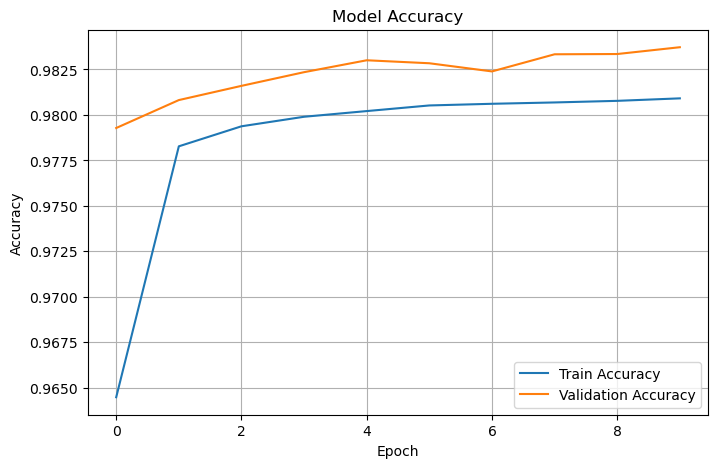

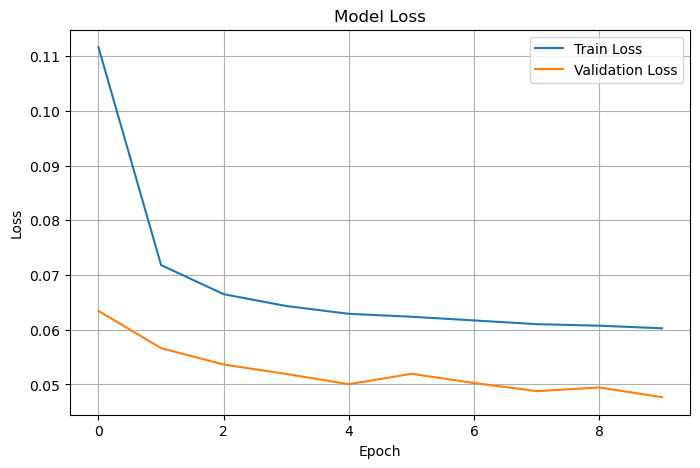

In [17]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training & validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
